In [1]:
import pandas as pd
import numpy as np

In [2]:
dp_01 = pd.read_csv('Data_Set.csv')
dp_01.head()

,Name of the data = Home Consumption,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Unit = kW and $/kW,NaN,NaN,NaN,NaN,NaN
1,Time,E_Plug,E_Heat,Price,Temperature,No. Occupants
2,1,24,28,10,-15,12
3,2,17,32,12,-17,12
4,3,16,34,11,-19,12


In [3]:
dp_01.shape

(27, 6)

# Changing header

In [4]:
dp_02 = pd.read_csv('Data_Set.csv', header=2)
dp_02.head()

,Time,E_Plug,E_Heat,Price,Temperature,No. Occupants
0,1,24.0,28,10,-15,12
1,2,17.0,32,12,-17,12
2,3,16.0,34,11,-19,12
3,3,16.0,34,11,-19,12
4,4,16.0,33,12,-18,12


In [5]:
dp_02.shape

(25, 6)

## Changing column name

In [6]:
dp_03 = dp_02.rename(columns ={'Temperature': 'Temp'})
dp_03.head()

,Time,E_Plug,E_Heat,Price,Temp,No. Occupants
0,1,24.0,28,10,-15,12
1,2,17.0,32,12,-17,12
2,3,16.0,34,11,-19,12
3,3,16.0,34,11,-19,12
4,4,16.0,33,12,-18,12


## Drop column

In [7]:
dp_03.drop('No. Occupants', inplace=True, axis=1)
dp_03.head()

,Time,E_Plug,E_Heat,Price,Temp
0,1,24.0,28,10,-15
1,2,17.0,32,12,-17
2,3,16.0,34,11,-19
3,3,16.0,34,11,-19
4,4,16.0,33,12,-18


# Statictis
## Duplicate vale


In [8]:
dup = dp_03[dp_03.duplicated()]
dup

,Time,E_Plug,E_Heat,Price,Temp
3,3,16.0,34,11,-19


## Drop duplicate

In [9]:
dp_04 = dp_03.drop(2, axis=0)
dp_04.head()

,Time,E_Plug,E_Heat,Price,Temp
0,1,24.0,28,10,-15
1,2,17.0,32,12,-17
3,3,16.0,34,11,-19
4,4,16.0,33,12,-18
5,5,16.0,30,10,-14


## Reset Index

In [10]:
dp_05 = dp_04.reset_index(drop=True)
dp_05.head()

,Time,E_Plug,E_Heat,Price,Temp
0,1,24.0,28,10,-15
1,2,17.0,32,12,-17
2,3,16.0,34,11,-19
3,4,16.0,33,12,-18
4,5,16.0,30,10,-14


In [11]:
dp_05.describe()

,Time,E_Plug,E_Heat,Temp
count,24.000000,23.000000,24.000000,24.000000
mean,12.500000,31.521739,25.666667,-10.250000
std,7.071068,21.336843,9.262672,7.968689
min,1.000000,16.000000,-4.000000,-22.000000
25%,6.750000,20.500000,19.750000,-16.250000
50%,12.500000,27.000000,28.500000,-13.000000
75%,18.250000,34.500000,32.000000,-3.000000
max,24.000000,120.000000,36.000000,3.000000


In [12]:
min_item = dp_05['E_Heat'].min()
min_item

-4

In [14]:
dp_05['E_Heat'][dp_05['E_Heat'] == min_item]

16   -4
Name: E_Heat, dtype: int64

In [15]:
dp_05['E_Heat'].replace(-4, 21, inplace = True)

In [16]:
dp_05

,Time,E_Plug,E_Heat,Price,Temp
0,1,24.0,28,10,-15
1,2,17.0,32,12,-17
2,3,16.0,34,11,-19
3,4,16.0,33,12,-18
4,5,16.0,30,10,-14
5,6,16.0,31,10,-16
6,7,19.0,28,14,-14
7,8,22.0,29,12,-15
8,9,25.0,26,12,-12
9,10,26.0,24,14,-8


In [17]:
dp_05[12:18]

,Time,E_Plug,E_Heat,Price,Temp
12,13,30.0,19,16,0
13,14,NaN,13,17,2
14,15,27.0,14,17,3
15,16,27.0,16,17,2
16,17,28.0,21,18,0
17,18,33.0,26,20,-6


## Covariance

In [18]:
dp_05.cov()

,Time,E_Plug,E_Heat,Temp
Time,50.000000,88.535573,-0.500000,8.217391
E_Plug,88.535573,455.260870,25.833992,0.154150
E_Heat,-0.500000,25.833992,47.346014,-51.206522
Temp,8.217391,0.154150,-51.206522,63.500000


In [21]:
import seaborn as sns

<AxesSubplot:>

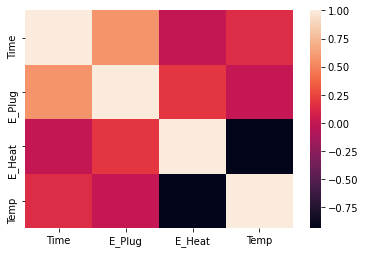

In [22]:
sns.heatmap(dp_05.corr())


## MIsing Value

In [19]:
dp_05.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    24 non-null     int64  
 1   E_Plug  23 non-null     float64
 2   E_Heat  24 non-null     int64  
 3   Price   24 non-null     object 
 4   Temp    24 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.1+ KB


In [23]:
dp_05.isna().sum()

Time      0
E_Plug    1
E_Heat    0
Price     0
Temp      0
dtype: int64

In [24]:
dp_05['Price'] = dp_05['Price'].replace('!', np.NaN)
dp_05.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    24 non-null     int64  
 1   E_Plug  23 non-null     float64
 2   E_Heat  24 non-null     int64  
 3   Price   23 non-null     object 
 4   Temp    24 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.1+ KB


In [25]:
dp_05['Price'] = dp_05['Price'].apply(pd.to_numeric)
dp_05.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    24 non-null     int64  
 1   E_Plug  23 non-null     float64
 2   E_Heat  24 non-null     int64  
 3   Price   23 non-null     float64
 4   Temp    24 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 1.1 KB


## Handiling mixing value

In [26]:
dp_05.drop(13, axis=0)

,Time,E_Plug,E_Heat,Price,Temp
0,1,24.0,28,10.0,-15
1,2,17.0,32,12.0,-17
2,3,16.0,34,11.0,-19
3,4,16.0,33,12.0,-18
4,5,16.0,30,10.0,-14
5,6,16.0,31,10.0,-16
6,7,19.0,28,14.0,-14
7,8,22.0,29,12.0,-15
8,9,25.0,26,12.0,-12
9,10,26.0,24,14.0,-8


In [27]:
dp_05

,Time,E_Plug,E_Heat,Price,Temp
0,1,24.0,28,10.0,-15
1,2,17.0,32,12.0,-17
2,3,16.0,34,11.0,-19
3,4,16.0,33,12.0,-18
4,5,16.0,30,10.0,-14
5,6,16.0,31,10.0,-16
6,7,19.0,28,14.0,-14
7,8,22.0,29,12.0,-15
8,9,25.0,26,12.0,-12
9,10,26.0,24,14.0,-8


In [28]:
dp_05.dropna(axis=0)

,Time,E_Plug,E_Heat,Price,Temp
0,1,24.0,28,10.0,-15
1,2,17.0,32,12.0,-17
2,3,16.0,34,11.0,-19
3,4,16.0,33,12.0,-18
4,5,16.0,30,10.0,-14
5,6,16.0,31,10.0,-16
6,7,19.0,28,14.0,-14
7,8,22.0,29,12.0,-15
8,9,25.0,26,12.0,-12
9,10,26.0,24,14.0,-8


In [29]:
dp_05.fillna(method='ffill')

,Time,E_Plug,E_Heat,Price,Temp
0,1,24.0,28,10.0,-15
1,2,17.0,32,12.0,-17
2,3,16.0,34,11.0,-19
3,4,16.0,33,12.0,-18
4,5,16.0,30,10.0,-14
5,6,16.0,31,10.0,-16
6,7,19.0,28,14.0,-14
7,8,22.0,29,12.0,-15
8,9,25.0,26,12.0,-12
9,10,26.0,24,14.0,-8


In [30]:
dp_05.fillna(method='bfill')

,Time,E_Plug,E_Heat,Price,Temp
0,1,24.0,28,10.0,-15
1,2,17.0,32,12.0,-17
2,3,16.0,34,11.0,-19
3,4,16.0,33,12.0,-18
4,5,16.0,30,10.0,-14
5,6,16.0,31,10.0,-16
6,7,19.0,28,14.0,-14
7,8,22.0,29,12.0,-15
8,9,25.0,26,12.0,-12
9,10,26.0,24,14.0,-8


# Input missing value with mean, medain and mode

<AxesSubplot:>

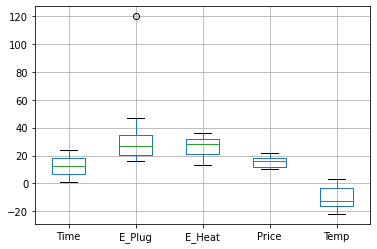

In [31]:
dp_05.boxplot()

In [35]:
dp_05['E_Plug'].fillna((dp_05['E_Plug'].median()), inplace=True)
dp_05

,Time,E_Plug,E_Heat,Price,Temp
0,1,24.0,28,10.0,-15
1,2,17.0,32,12.0,-17
2,3,16.0,34,11.0,-19
3,4,16.0,33,12.0,-18
4,5,16.0,30,10.0,-14
5,6,16.0,31,10.0,-16
6,7,19.0,28,14.0,-14
7,8,22.0,29,12.0,-15
8,9,25.0,26,12.0,-12
9,10,26.0,24,14.0,-8


In [36]:
## Missing value for price 
dp_05['Price'].fillna((dp_05['Price'].mean()), inplace=True)
dp_05

,Time,E_Plug,E_Heat,Price,Temp
0,1,24.0,28,10.000000,-15
1,2,17.0,32,12.000000,-17
2,3,16.0,34,11.000000,-19
3,4,16.0,33,12.000000,-18
4,5,16.0,30,10.000000,-14
5,6,16.0,31,10.000000,-16
6,7,19.0,28,14.000000,-14
7,8,22.0,29,12.000000,-15
8,9,25.0,26,12.000000,-12
9,10,26.0,24,14.000000,-8


In [38]:
dp_05[12:]

,Time,E_Plug,E_Heat,Price,Temp
12,13,30.0,19,16.000000,0
13,14,27.0,13,17.000000,2
14,15,27.0,14,17.000000,3
15,16,27.0,16,17.000000,2
16,17,28.0,21,18.000000,0
17,18,33.0,26,20.000000,-6
18,19,42.0,32,21.000000,-8
19,20,120.0,33,21.000000,-12
20,21,47.0,32,21.000000,-16
21,22,44.0,30,22.000000,-18


## Concatenating



In [40]:
new_col = pd.read_csv('Data_New.csv')
new_col

,P/OffP
0,OffPeak
1,OffPeak
2,OffPeak
3,OffPeak
4,OffPeak
5,OffPeak
6,Peak
7,Peak
8,Peak
9,OffPeak


In [42]:
dp_06 = pd.concat([dp_05, new_col], axis=1)
dp_06.head()

,Time,E_Plug,E_Heat,Price,Temp,P/OffP
0,1,24.0,28,10.0,-15,OffPeak
1,2,17.0,32,12.0,-17,OffPeak
2,3,16.0,34,11.0,-19,OffPeak
3,4,16.0,33,12.0,-18,OffPeak
4,5,16.0,30,10.0,-14,OffPeak


In [43]:
dp_06.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     24 non-null     int64  
 1   E_Plug   24 non-null     float64
 2   E_Heat   24 non-null     int64  
 3   Price    24 non-null     float64
 4   Temp     24 non-null     int64  
 5   P/OffP   24 non-null     object 
dtypes: float64(2), int64(3), object(1)
memory usage: 1.2+ KB


In [48]:
dp_07= pd.get_dummies(dp_06)
dp_07.head()

,Time,E_Plug,E_Heat,Price,Temp,P/OffP _OffPeak,P/OffP _Peak
0,1,24.0,28,10.0,-15,1,0
1,2,17.0,32,12.0,-17,1,0
2,3,16.0,34,11.0,-19,1,0
3,4,16.0,33,12.0,-18,1,0
4,5,16.0,30,10.0,-14,1,0


## Normalization

In [51]:
from sklearn.preprocessing import minmax_scale, normalize

In [53]:
dp_07.iloc[:]

,Time,E_Plug,E_Heat,Price,Temp,P/OffP _OffPeak,P/OffP _Peak
0,1,24.0,28,10.000000,-15,1,0
1,2,17.0,32,12.000000,-17,1,0
2,3,16.0,34,11.000000,-19,1,0
3,4,16.0,33,12.000000,-18,1,0
4,5,16.0,30,10.000000,-14,1,0
5,6,16.0,31,10.000000,-16,1,0
6,7,19.0,28,14.000000,-14,0,1
7,8,22.0,29,12.000000,-15,0,1
8,9,25.0,26,12.000000,-12,0,1
9,10,26.0,24,14.000000,-8,1,0


In [54]:
dp_07.iloc[:,0:5]

,Time,E_Plug,E_Heat,Price,Temp
0,1,24.0,28,10.000000,-15
1,2,17.0,32,12.000000,-17
2,3,16.0,34,11.000000,-19
3,4,16.0,33,12.000000,-18
4,5,16.0,30,10.000000,-14
5,6,16.0,31,10.000000,-16
6,7,19.0,28,14.000000,-14
7,8,22.0,29,12.000000,-15
8,9,25.0,26,12.000000,-12
9,10,26.0,24,14.000000,-8


In [64]:
dp_08 = minmax_scale(dp_07.iloc[:,0:5], feature_range=(0,1))
print(dp_08)
print("============================")
dp_09 = normalize(dp_07.iloc[:,0:5], norm='l2', axis=0)
print(dp_09)

[[0.         0.07692308 0.65217391 0.         0.28      ]
 [0.04347826 0.00961538 0.82608696 0.16666667 0.2       ]
 [0.08695652 0.         0.91304348 0.08333333 0.12      ]
 [0.13043478 0.         0.86956522 0.16666667 0.16      ]
 [0.17391304 0.         0.73913043 0.         0.32      ]
 [0.2173913  0.         0.7826087  0.         0.24      ]
 [0.26086957 0.02884615 0.65217391 0.33333333 0.32      ]
 [0.30434783 0.05769231 0.69565217 0.16666667 0.28      ]
 [0.34782609 0.08653846 0.56521739 0.16666667 0.4       ]
 [0.39130435 0.09615385 0.47826087 0.33333333 0.56      ]
 [0.43478261 0.10576923 0.30434783 0.33333333 0.72      ]
 [0.47826087 0.13461538 0.26086957 0.5        0.88      ]
 [0.52173913 0.13461538 0.26086957 0.5        0.88      ]
 [0.56521739 0.10576923 0.         0.58333333 0.96      ]
 [0.60869565 0.10576923 0.04347826 0.58333333 1.        ]
 [0.65217391 0.10576923 0.13043478 0.58333333 0.96      ]
 [0.69565217 0.11538462 0.34782609 0.66666667 0.88      ]
 [0.73913043 0

In [65]:
dp_10= pd.DataFrame(dp_09, columns = ['Time', 'E_Plug', 'E_Heat', 'Price', 'Temp'])
dp_10.head()

,Time,E_Plug,E_Heat,Price,Temp
0,0.014286,0.130935,0.207499,0.128488,-0.237706
1,0.028571,0.092745,0.237141,0.154186,-0.269400
2,0.042857,0.087290,0.251962,0.141337,-0.301095
3,0.057143,0.087290,0.244552,0.154186,-0.285248
4,0.071429,0.087290,0.222320,0.128488,-0.221859


In [66]:
dp_11 = pd.concat([dp_10, dp_07['P/OffP _OffPeak'], dp_07['P/OffP _Peak']], axis = 1)
dp_11.head()


,Time,E_Plug,E_Heat,Price,Temp,P/OffP _OffPeak,P/OffP _Peak
0,0.014286,0.130935,0.207499,0.128488,-0.237706,1,0
1,0.028571,0.092745,0.237141,0.154186,-0.269400,1,0
2,0.042857,0.087290,0.251962,0.141337,-0.301095,1,0
3,0.057143,0.087290,0.244552,0.154186,-0.285248,1,0
4,0.071429,0.087290,0.222320,0.128488,-0.221859,1,0
